In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("C:\\Users\\Vipul Chheda\\OneDrive\\Desktop\\PYTHON\\Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [46]:
df.shape

(10337, 2)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [48]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [49]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [50]:
len(df[df.duplicated()])

66

There are 66 duplicate rows, let's drop them...

In [51]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [52]:
df.shape

(10271, 2)

The dataset contains texts from 17 different languages:

In [53]:
df["Language"].nunique()

17

How many rows belong to each language?:

In [54]:
df["Language"].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

visually...:

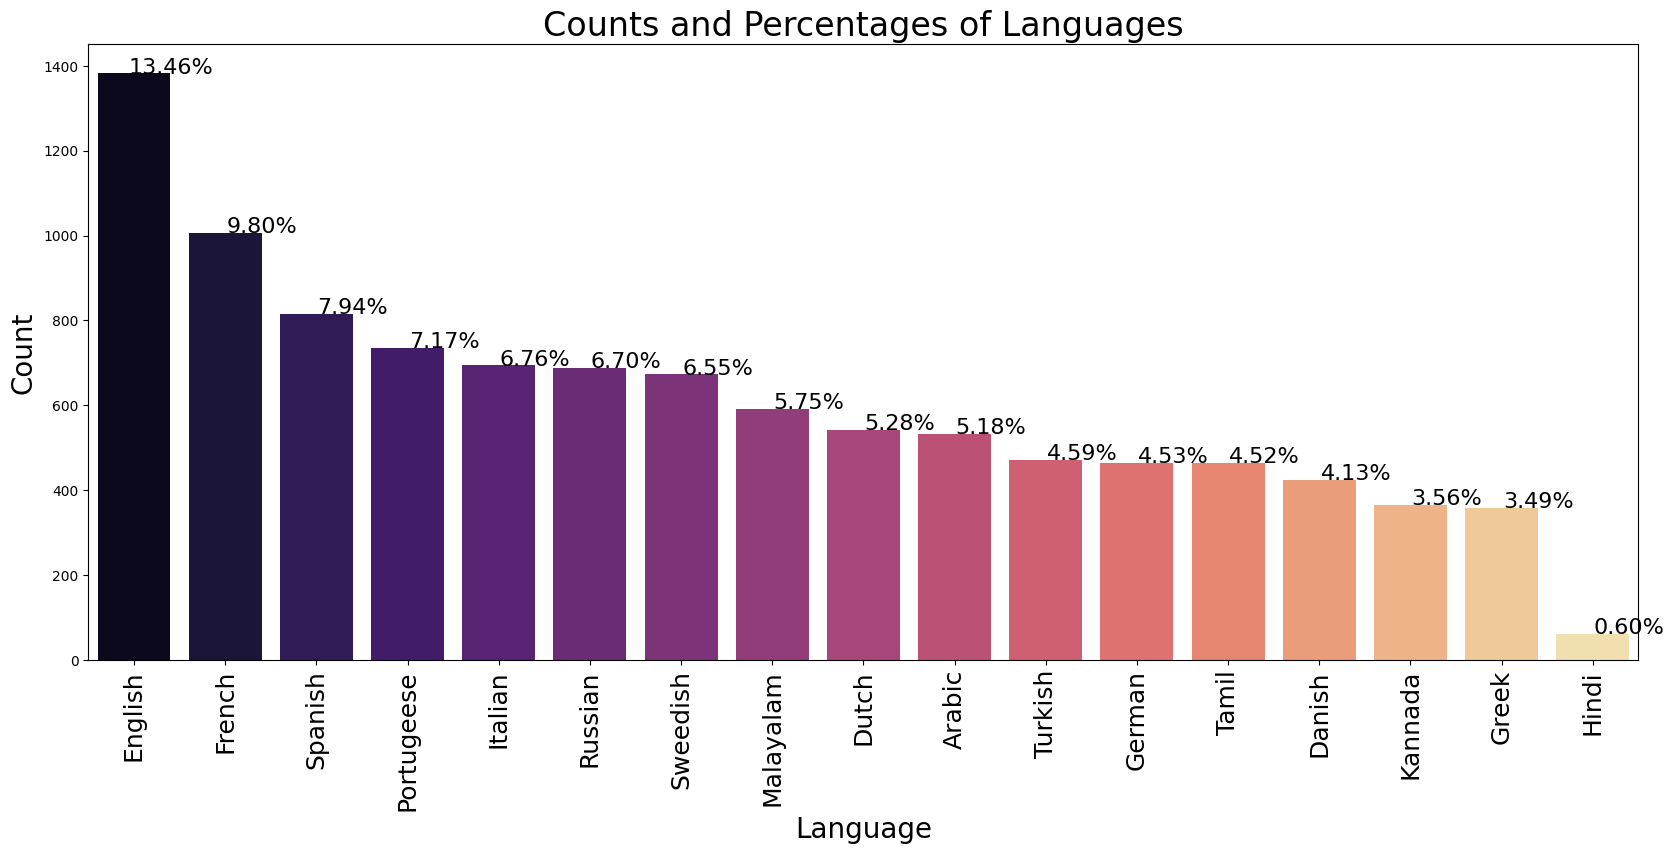

In [55]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [56]:
language= df['Language'].value_counts().reset_index()
language

,Language,count
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Text Preprocessing</b></p>

Let's create a new column for cleaned text:

In [57]:
df1= df.copy()
df1['Cleaned_Text']= ""
df1

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [58]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

and let's clean:

In [59]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,Cleaned_Text,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,,the word nature is borrowed from the old fren...
...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Feature selection</b></p>

Text data is the independent variable and the language name is the dependent variable.

In [60]:
X= df1["cleaned_Text"]
y= df1["Language"]

# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Label Encoding</b></p>

Language names make up our output variable, which is a categorical variable. We are conducting label encoding on that output variable because we should need to turn it into a numerical form for training the model. We are importing LabelEncoder from sklearn for this procedure.

In [61]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)

# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Bag of words</b></p>

As is common knowledge, both the input and the output features must be in numerical form. Therefore, using CountVectorizer to build a Bag of Words model, we are converting text into numerical form.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Splitting</b></p>

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Training</b></p>

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()    
}

In [65]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...


Random Forest trained
MNB training started...
MNB trained
CPU times: total: 2min 2s
Wall time: 6min 53s


# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Model evalution</b></p>

In [66]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [67]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

MemoryError: Unable to allocate 151. MiB for an array with shape (2568, 7703) and data type float64

The accuracy of the MNB model is 0.98 which is very good and our model is performing well. 

In [69]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------


              precision    recall  f1-score   support

           0       0.58      0.35      0.44       146
           1       0.76      0.55      0.64       103
           2       0.87      0.46      0.60       133
           3       0.97      0.59      0.74       361
           4       0.89      0.56      0.69       255
           5       0.84      0.46      0.59       114
           6       1.00      0.48      0.65        79
           7       1.00      0.33      0.50        12
           8       0.97      0.45      0.61       159
           9       0.08      0.97      0.16        86
          10       0.81      0.72      0.76       161
          11       0.90      0.48      0.63       178
          12       0.79      0.29      0.43       150
          13       0.79      0.55      0.65       205
          14       0.99      0.49      0.66       182
          15       0.41      0.86      0.55       111
          16       1.00      0.20      0.34       133

    accuracy              

K-Nearest Neighbors ConfusionMatrix


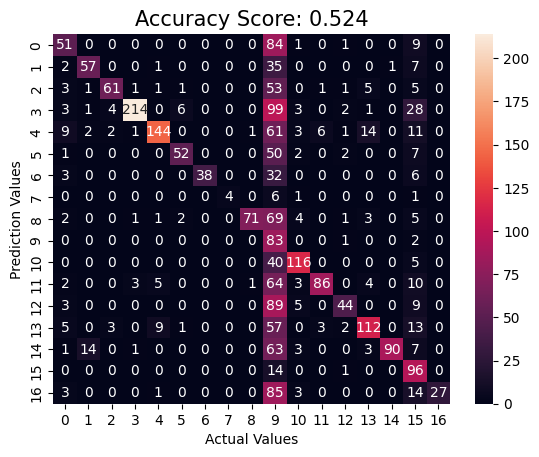

******************************
 
Random Forest ConfusionMatrix


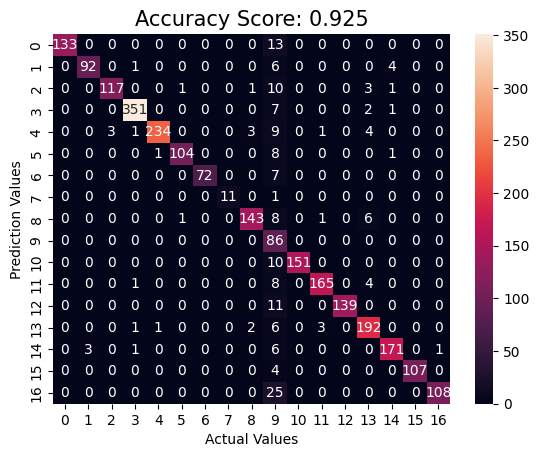

******************************
 
MNB ConfusionMatrix


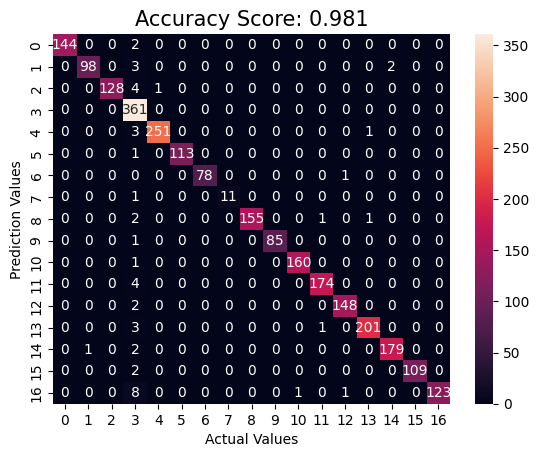

******************************
 


In [70]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

# <p style="background-color:blue;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius10px 10px;"><b>Predictions</b></p>

In [77]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= models['MNB'].predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [79]:
prediction("Hi my name is Naman")

This word/sentence contains English word(s).


In [81]:
prediction("mi nombre es naman")

This word/sentence contains Spanish word(s).


In [83]:
prediction("меня зовут Наман")

This word/sentence contains Russian word(s).
